## Inicializações, mkdir

In [ ]:
#!pip install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:

!mkdir -p MNIST/trn_img/
!mkdir -p MNIST/trn_lab/
!mkdir -p MNIST/models/crs5/0/
!mkdir -p MNIST/models/crs5/1/
!mkdir -p MNIST/models/crs5/2/
!mkdir -p MNIST/models/crs5/3/
!mkdir -p MNIST/models/crs5/4/
!mkdir -p MNIST/trn_img_f/
!mkdir -p MNIST/trn_lab_f/

!mkdir -p FashionMNIST/trn_img/
!mkdir -p FashionMNIST/trn_lab/
!mkdir -p FashionMNIST/models/crs5/0/
!mkdir -p FashionMNIST/models/crs5/1/
!mkdir -p FashionMNIST/models/crs5/2/
!mkdir -p FashionMNIST/models/crs5/3/
!mkdir -p FashionMNIST/models/crs5/4/
!mkdir -p FashionMNIST/trn_img_f/
!mkdir -p FashionMNIST/trn_lab_f/

!mkdir -p CIFAR10/trn_img/
!mkdir -p CIFAR10/trn_lab/
!mkdir -p CIFAR10/models/crs5/0/
!mkdir -p CIFAR10/models/crs5/1/
!mkdir -p CIFAR10/models/crs5/2/
!mkdir -p CIFAR10/models/crs5/3/
!mkdir -p CIFAR10/models/crs5/4/
!mkdir -p CIFAR10/trn_img_f/
!mkdir -p CIFAR10/trn_lab_f/

!mkdir -p SVHN/trn_img/
!mkdir -p SVHN/trn_lab/
!mkdir -p SVHN/models/crs5/0//models/crs5/0/
!mkdir -p SVHN/models/crs5/1//models/crs5/1/
!mkdir -p SVHN/models/crs5/2//models/crs5/2/
!mkdir -p SVHN/models/crs5/3//models/crs5/3/
!mkdir -p SVHN/models/crs5/4//models/crs5/4/
!mkdir -p SVHN/trn_img_f/
!mkdir -p SVHN/trn_lab_f/


!mkdir -p CelebA/trn_img/
!mkdir -p CelebA/trn_lab/
!mkdir -p CelebA/models/crs5/0//models/crs5/0/
!mkdir -p CelebA/models/crs5/1//models/crs5/1/
!mkdir -p CelebA/models/crs5/2//models/crs5/2/
!mkdir -p CelebA/models/crs5/3//models/crs5/3/
!mkdir -p CelebA/models/crs5/4//models/crs5/4/
!mkdir -p CelebA/trn_img_f/
!mkdir -p CelebA/trn_lab_f/


In [ ]:
import collections
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
import time
import os
import torchvision
from torchvision import datasets,transforms
import torchvision.transforms as transforms
from sklearn.model_selection import KFold,StratifiedKFold

print(torch.version.cuda) #10.1
t3 = time.time()

11.3


## Argumentos

In [ ]:
##############################################################################
"""args for AE"""

#MNIST e FMNIST n_channel = 1 e n_z = 300
#Cifar10 e SVHN n_channel = 3 e n_z = 600

args = {}
args['dim_h'] = 64         # factor controlling size of hidden layers
args['n_channel'] = 1 #1  ou 3    # number of channels in the input data 

args['n_z'] = 300 #300 ou 600     # number of dimensions in latent space. 

args['sigma'] = 1.0        # variance in n_z
args['lambda'] = 0.01      # hyper param for weight of discriminator loss
args['lr'] = 0.0002        # learning rate for Adam optimizer .000
args['epochs'] = 10       # how many epochs to run for
args['batch_size'] = 100   # batch size for SGD
args['save'] = True        # save weights at each epoch of training if True
args['train'] = True       # train networks if True, else load networks from

args['dataset'] = 'fashionmnist' # 'mnist' ou 'fashionmnist' ou 'cifar10' ou 'svhn'  # specify which dataset to use
#args['oversampling'] = 'smote' # 'smote' ou 'adasyn'
args['resnet_learning_rate'] = 0.001
args['resnet_num_epochs'] = 5



## Importando os datasets 

In [ ]:
###############################################################################


#NOTE: Download the training ('.../0_trn_img.txt') and label files 
# ('.../0_trn_lab.txt').  Place the files in directories (e.g., ../MNIST/trn_img/
# and /MNIST/trn_lab/).  Originally, when the code was written, it was for 5 fold
#cross validation and hence there were 5 files in each of the 
#directories.  Here, for illustration, we use only 1 training and 1 label
#file (e.g., '.../0_trn_img.txt' and '.../0_trn_lab.txt').

## transformation





if( args['dataset']== 'mnist'):
  #transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(28,28))])
  #dataset_torch = datasets.MNIST(root='./', train=True, download=True, transform=transform)
  train_dataset = torchvision.datasets.MNIST(root='./',  train=True, download=True)
  test_dataset  = torchvision.datasets.MNIST(root='./',  train=False, download=True)
  dir_model = 'MNIST'
  print("Mnist")
elif( args['dataset']== 'fashionmnist'):
  #transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(28,28))])
  #dataset_torch = datasets.FashionMNIST(root='./', train=True, download=True, transform=transform)
  train_dataset = torchvision.datasets.FashionMNIST(root='./',  train=True, download=True)
  test_dataset  = torchvision.datasets.FashionMNIST(root='./',  train=False, download=True)
  dir_model = 'FashionMNIST'
  print("FashionMNIST")
elif( args['dataset']== 'cifar10'):
  #transform = transforms.Compose( [transforms.ToTensor(), transforms.Resize(size=(32,32))])
  #dataset_torch = datasets.CIFAR10(root='./', train=True, download=True, transform=transform)
  train_dataset = torchvision.datasets.CIFAR10(root='./',  train=True, download=True)
  test_dataset  = torchvision.datasets.CIFAR10(root='./',  train=False, download=True)
  dir_model = 'CIFAR10'
  print("CIFAR10")
elif( args['dataset']== 'svhn'):
  #transform = transforms.Compose( [transforms.ToTensor(), transforms.Resize(size=(32,32))])
  #dataset_torch = datasets.SVHN(root='./', train=True, download=True, transform=transform)
  train_dataset = torchvision.datasets.SVHN(root='./',  train=True, download=True)
  test_dataset  = torchvision.datasets.SVHN(root='./',  train=False, download=True)
  dir_model = 'SVHN'
  print("SVHN")


'''

!mv MNIST/raw/train-images-idx3-ubyte MNIST/trn_img/0_trn_img.txt
!mv MNIST/raw/train-labels-idx1-ubyte MNIST/trn_lab/0_trn_lab.txt
dtrnimg = 'MNIST/trn_img/'
dtrnlab = 'MNIST/trn_lab/'

## download and load training dataset
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
#                                          shuffle=True, num_workers=2)
'''
def get_imbalance_train():
  if(args['dataset'] =='mnist' or args['dataset'] =='fashionmnist'):
    return [4000, 2000, 1000, 750, 500, 350, 200, 100, 60, 40]
  elif (args['dataset'] =='cifar10' or args['dataset'] =='svhn'):
    return [4500, 2000, 1000, 800, 600, 500, 400, 250, 150, 80]
  #else:
  #   [4500, 2000, 1000, 800, 600, 500, 400, 250, 150, 80]


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw

FashionMNIST


In [ ]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_dataset.transform=transform
test_dataset.transform=transform

In [ ]:
#dataset = ConcatDataset([train_dataset, test_dataset])
#tmp = DataLoader(dataset, batch_size=70000, shuffle=True)
#dec_x, dec_y = next(iter(tmp))

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
criterion = nn.CrossEntropyLoss()

dataset = ConcatDataset([train_dataset, test_dataset])

num_epochs=10
batch_size=128
k=5
splits=StratifiedKFold(n_splits=k,shuffle=True,random_state=42)
foldperf={}
tmp = DataLoader(dataset, batch_size=70000, shuffle=True)
dec_x, dec_y = next(iter(tmp))
def get_exactly_6000(c,dec_x, dec_y):
    
    xbeg = dec_x[dec_y == c]
    ybeg = dec_y[dec_y == c]
    
    return [xbeg[0:1200],xbeg[1200:2400],xbeg[2400:3600],xbeg[3600:4800],xbeg[4800:6000]], [ybeg[0:1200],ybeg[1200:2400],ybeg[2400:3600],ybeg[3600:4800],ybeg[4800:6000]]
    
def generate_balanced_folds(dec_x, dec_y):
  X_list = [[],[],[],[],[]]
  y_list = [[],[],[],[],[]]
  foldsX = []
  foldsY = []
  for i in range(0,10):
    X,y = get_exactly_6000(i,dec_x, dec_y)
    print(torch.bincount(y[0]))
    for j in range(0,5):
      X_list[j].append(X[j])
      y_list[j].append(y[j])

  for j in range(0,5):
    X = torch.cat(X_list[j])
    y = torch.cat(y_list[j])
    foldsX.append(X)
    foldsY.append(y)
    
  return foldsX, foldsY

In [ ]:
foldsX, foldsY = generate_balanced_folds(dec_x, dec_y)
del dec_x
del dec_y
del tmp
del dataset

tensor([1200])
tensor([   0, 1200])
tensor([   0,    0, 1200])
tensor([   0,    0,    0, 1200])
tensor([   0,    0,    0,    0, 1200])
tensor([   0,    0,    0,    0,    0, 1200])
tensor([   0,    0,    0,    0,    0,    0, 1200])
tensor([   0,    0,    0,    0,    0,    0,    0, 1200])
tensor([   0,    0,    0,    0,    0,    0,    0,    0, 1200])
tensor([   0,    0,    0,    0,    0,    0,    0,    0,    0, 1200])


tensor(4)


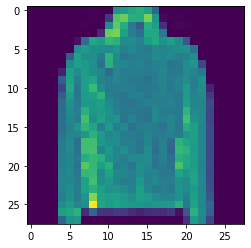

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(transforms.ToPILImage()(foldsX[4][5066]))
print(foldsY[0][5066])

## Classes Encoder e Decoder 

In [ ]:
##############################################################################


## create encoder model and decoder model
class Encoder(nn.Module):
    def __init__(self, args):
        super(Encoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']
        
        # convolutional filters, work excellent with image data
        self.conv = nn.Sequential(
            nn.Conv2d(self.n_channel, self.dim_h, 4, 2, 1, bias=False),
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h, self.dim_h * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 2),
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h * 2, self.dim_h * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 4),
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True),



            # MNIST,FMNIST
            nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 2, 1, bias=False),  
            
            #3d and 32 by 32
            #nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 1, 0, bias=False),
            
            nn.BatchNorm2d(self.dim_h * 8), # 40 X 8 = 320
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True) )#,
            #nn.Conv2d(self.dim_h * 8, 1, 2, 1, 0, bias=False))
            #nn.Conv2d(self.dim_h * 8, 1, 4, 1, 0, bias=False))
        # final layer is fully connected
        self.fc = nn.Linear(self.dim_h * (2 ** 3), self.n_z)
        

    def forward(self, x):
        #print('enc')
        #print('input ',x.size()) #torch.Size([100, 3,32,32])
        x = self.conv(x)
        #print(x.shape)
        
        x = x.squeeze()
        #print(x.shape)
        #print('aft squeeze ',x.size()) #torch.Size([128, 320])
        #aft squeeze  torch.Size([100, 320])
        x = self.fc(x)
        #print('out ',x.size()) #torch.Size([128, 20])
        #out  torch.Size([100, 300])
        return x


class Decoder(nn.Module):
    def __init__(self, args):
        super(Decoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']

        # first layer is fully connected
        self.fc = nn.Sequential(
            nn.Linear(self.n_z, self.dim_h * 8 * 7 *7),
            nn.ReLU())

        # deconvolutional filters, essentially inverse of convolutional filters
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(self.dim_h * 8, self.dim_h * 4, 4),
            nn.BatchNorm2d(self.dim_h * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(self.dim_h * 4, self.dim_h * 2, 4),
            nn.BatchNorm2d(self.dim_h * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(self.dim_h * 2, self.n_channel, 4, stride=2),
            #nn.Sigmoid())
            nn.Tanh())

    def forward(self, x):
        #print('dec')
        #print('input ',x.size())
        x = self.fc(x)
        x = x.view(-1, self.dim_h * 8, 7, 7)
        x = self.deconv(x)
        return x

##############################################################################
"""set models, loss functions"""
# control which parameters are frozen / free for optimization
def free_params(module: nn.Module):
    for p in module.parameters():
        p.requires_grad = True

def frozen_params(module: nn.Module):
    for p in module.parameters():
        p.requires_grad = False









In [ ]:
#encoder_tmp = Encoder(args)
#encoder_tmp.eval()

In [ ]:
#encoder_tmp(dec_x[0])

## Treinamento do Encoder/Decoder

In [ ]:
#%%time
'''
ids = os.listdir(dtrnimg)
idtri_f = [os.path.join(dtrnimg, image_id) for image_id in ids]
print(idtri_f)

ids = os.listdir(dtrnlab)
idtrl_f = [os.path.join(dtrnlab, image_id) for image_id in ids]
print(idtrl_f)
'''

def train_enc_dec(dataset_torch, fold_id):
  #for i in range(1):
  #for i in range(len(ids)):
      encoder = Encoder(args)
      decoder = Decoder(args)

      device = 'cuda' if torch.cuda.is_available() else 'cpu'
      print(device)
      decoder = decoder.to(device)
      encoder = encoder.to(device)

      train_on_gpu = torch.cuda.is_available()

      #decoder loss function
      criterion = nn.MSELoss()
      criterion = criterion.to(device)
      
  #    trnimgfile = idtri_f[i]
  #    trnlabfile = idtrl_f[i]
      
  #    print(trnimgfile)
  #    print(trnlabfile)
  #    dec_x = trnimgfile
  #    dec_y = trnlabfile

  #    dec_x = 
  #    dec_y = MNISTtorch.targets
  #   print('train imgs before reshape ',dec_x.shape) 
  #   print('train labels ',dec_y.shape) 
  #   print(collections.Counter(dec_y))
  #   dec_x = dec_x.reshape(dec_x.shape[0],1,28,28)   
  #   print('train imgs after reshape ',dec_x.shape) 

      dl_batch_size = batch_size=dataset_torch.__len__()
      batch_size = args['batch_size']
      num_workers = 0

      #torch.Tensor returns float so if want long then use torch.tensor
  #   tensor_x = dec_x
  #   tensor_y = MNISTtorch.target
  #   mnist_bal = TensorDataset(tensor_x,tensor_y) 
      train_loader = torch.utils.data.DataLoader(dataset_torch, batch_size=batch_size,shuffle=True,num_workers=num_workers)
      
      ## Carregar dataset na memória
      dl_aux = torch.utils.data.DataLoader(dataset_torch, batch_size=dl_batch_size,shuffle=True,num_workers=num_workers)
      
      dec_x, dec_y = next(iter(dl_aux))

      del dl_aux

      classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

      best_loss = np.inf

      t0 = time.time()
      if args['train']:
          enc_optim = torch.optim.Adam(encoder.parameters(), lr = args['lr'])
          dec_optim = torch.optim.Adam(decoder.parameters(), lr = args['lr'])
      
          for epoch in range(args['epochs']):
              train_loss = 0.0
              tmse_loss = 0.0
              tdiscr_loss = 0.0
              # train for one epoch -- set nets to train mode
              encoder.train()
              decoder.train()
          
              for images,labs in train_loader:
              
                  # zero gradients for each batch
                  encoder.zero_grad()
                  decoder.zero_grad()
                  #print(images)
                  images, labs = images.to(device), labs.to(device)
                  #print('images ',images.size()) 
                  labsn = labs.detach().cpu().numpy()
                  #print('labsn ',labsn.shape, labsn)
              
                  # run images
                  z_hat = encoder(images)
              
                  x_hat = decoder(z_hat) #decoder outputs tanh
                  #print('xhat ', x_hat.size())
                  #print(x_hat)

                  #Reconstruction Loss
                  mse = criterion(x_hat,images)
                  #print('mse ',mse)
                  
                        
                  resx = []
                  resy = []

                  #Randomly sample classes            
                  tc = np.random.randint(10)
                  #tc = 9
                  #print("Class:", tc)

                  #Randomly sample nsamp instances of that class
                  xbeg = dec_x[dec_y == tc]
                  ybeg = dec_y[dec_y == tc] 
                  xlen = len(xbeg)
                  #print("xlen", xlen)
                  nsamp = min(xlen, 100)
                  ind = np.random.choice(list(range(len(xbeg))),nsamp,replace=False)
                  xclass = xbeg[ind]
                  yclass = ybeg[ind]
              
                  xclen = len(xclass)
                  #print('xclen ',xclen)
                  xcminus = np.arange(1,xclen)
                  #print('minus ',xcminus.shape,xcminus)
                  
                  xcplus = np.append(xcminus,0)
                  #print('xcplus ',xcplus)
                  xcnew = (xclass[[xcplus],:])
                  #xcnew = np.squeeze(xcnew)
                  xcnew = xcnew.reshape(xcnew.shape[1],xcnew.shape[2],xcnew.shape[3],xcnew.shape[4])
                  #print('xcnew ',xcnew.shape)
              
                  xcnew = torch.Tensor(xcnew)
                  xcnew = xcnew.to(device)
              
                  #Encode xclass to feature space
                  xclass = torch.Tensor(xclass)
                  xclass = xclass.to(device)
                  xclass = encoder(xclass)
                  #print('xclass ',xclass.shape) 
              
                  xclass = xclass.detach().cpu().numpy()
              
                  xc_enc = (xclass[[xcplus],:])
                  xc_enc = np.squeeze(xc_enc)
                  #print('xc enc ',xc_enc.shape)
              
                  xc_enc = torch.Tensor(xc_enc)
                  xc_enc = xc_enc.to(device)

                  #Decode
                  ximg = decoder(xc_enc)
                  
                  #Penalty Loss 
                  mse2 = criterion(ximg,xcnew)
              
                  comb_loss = mse2 + mse
                  comb_loss.backward()
              
                  enc_optim.step()
                  dec_optim.step()
              
                  train_loss += comb_loss.item()*images.size(0)
                  tmse_loss += mse.item()*images.size(0)
                  tdiscr_loss += mse2.item()*images.size(0)
              
                  
              # print avg training statistics 
              train_loss = train_loss/len(train_loader)
              tmse_loss = tmse_loss/len(train_loader)
              tdiscr_loss = tdiscr_loss/len(train_loader)
              print('Epoch: {} \tTrain Loss: {:.6f} \tmse loss: {:.6f} \tmse2 loss: {:.6f}'.format(epoch,
                      train_loss,tmse_loss,tdiscr_loss))
              
          
  #########################5 Way Cross Validation#################################       
            #store the best encoder and decoder models
              #here, /crs5 is a reference to 5 way cross validation, but is not
              #necessary for illustration purposes
              if train_loss < best_loss:
                  print('Saving..')
                  path_enc = dir_model+'/models/crs5/' \
                      + str(fold_id) + '/bst_enc.pth'
                  path_dec = dir_model+'/models/crs5/' \
                      + str(fold_id) + '/bst_dec.pth'
              
                  torch.save(encoder.state_dict(), path_enc)
                  torch.save(decoder.state_dict(), path_dec)
          
                  best_loss = train_loss
  ################################################################################        
          
          #in addition, store the final model (may not be the best) for
          #informational purposes
          path_enc = dir_model+'/models/crs5/' \
              + str(fold_id) + '/f_enc.pth'
          path_dec = dir_model+'/models/crs5/' \
              + str(fold_id) + '/f_dec.pth'
          print(path_enc)
          print(path_dec)
          torch.save(encoder.state_dict(), path_enc)
          torch.save(decoder.state_dict(), path_dec)
          print()
                
        #t1 = time.time()
        #print('total time(min): {:.2f}'.format((t1 - t0)/60))             
  
      #t4 = time.time()
      #print('final time(min): {:.2f}'.format((t4 - t3)/60))
    

## SMOTE/Adasyn

In [ ]:
##############################################################################

def biased_get_class1(c, dec_x, dec_y):
    
    xbeg = dec_x[dec_y == c]
    ybeg = dec_y[dec_y == c]
    
    return xbeg, ybeg
    #return xclass, yclass
'''


'''

def G_SM1(X, y,n_to_sample,cl):

    
    # fitting the model
    n_neigh = 5 + 1
    knn = NearestNeighbors(n_neighbors=n_neigh, n_jobs=1)
    knn.fit(X)
    dist, ind = knn.kneighbors(X)

    # generating samples
    base_indices = np.random.choice(list(range(len(X))),n_to_sample)
    neighbor_indices = np.random.choice(list(range(1, n_neigh)),n_to_sample)

    X_base = X[base_indices]
    X_neighbor = X[ind[base_indices, neighbor_indices]]

    samples = X_base + np.multiply(np.random.rand(n_to_sample,1),
            X_neighbor - X_base)

    #use 10 as label because 0 to 9 real classes and 1 fake/smoted = 10
    return samples, [cl]*n_to_sample

#############################################################################



In [ ]:
def adasyn(X, y,xclass, yclass,  cl, m_major, m_minor, beta=1):
  '''
  Inputs:
  X: conjunto de dados ordenados por classe (Da classe 0 a 9)
  y : conjunto de labels ordenados por classe (Da classe 0 a 9)
  xclass: conjunto de dados da classe alvo
  yclass: conjunto de labels da classe alvo
  cl : classe alvo
  m_major : número de instâncias da classe majoritária
  m_minor : número de instâncias da classe minoritária (alvo)
  beta : parâmetros que controla quantas instâncias são geradas. Default=1
  '''
  #Número de neighbors
  K = 5
  d= m_major/m_minor
  #if(d>threshold) acaba aqui
  G = (m_major-m_minor)*beta
  # fitting the model


  clf = neighbors.KNeighborsClassifier()
  clf.fit(X, y)
  Ri = []
  Minority_per_xi = []
  #print("Deu fit")
  #print(xclass.shape)
  for i in range(m_minor):
    # Returns indices of the closest neighbours, and return it as a list
    xi = xclass[i, :].reshape(1, -1)
    # Returns indices of the closest neighbours, and return it as a list
    neighbours = clf.kneighbors(xi, n_neighbors=K, return_distance=False)[0]
    delta=0
    for j in neighbours:
      if(y[j]!=0):
        delta+=1
        
    Ri.append(delta/K)

    #print("Delta:", delta)
    minority = []
    for index in neighbours:
            # Shifted back 1 because indices start at 0
            if y[index]==cl:
                minority.append(index)
    Minority_per_xi.append(minority)
  #print("Calculei Ri")
  Ri_norm = []
  for ri in Ri:
    ri_norm = ri / sum(Ri)
    Ri_norm.append(ri_norm)
  #print("Normalizei Ri")
  #assert (sum(Rhat_i) > 0.99)
  Gi = []
  for r in Ri_norm:
    gi = round(r * G)
    Gi.append(int(gi)) 
  syn_data=[]
  syn_number =0
  #print("Calculei Gi")
  for i in range(m_minor):
    #gerar classes
    neighbor_indices = np.random.choice(list(range(1, K+1)),Gi[i])
    for j in range(Gi[i]):
        # If the minority list is not empty
        if Minority_per_xi[i]:
            index = np.random.choice(Minority_per_xi[i])
            xzi = X[index, :].reshape(1, -1)
            si = xi + (xzi - xi) * np.random.uniform(0, 1)
            syn_data.append(si)
            syn_number+=1
  #print("Gerei os exemplos")
  return syn_data, [cl]*syn_number

## Generate Samples

In [ ]:
def GenerateSamples(dataset_torch, fold_id, oversampling_method):
  '''
  Inputs:
  dataset_torch: O dataset
  fold_id: O id do fold
  oversampling_method: O método de oversampling
  '''
  np.printoptions(precision=5,suppress=True)
  #%time
  '''
  dtrnimg = '.../0_trn_img.txt'
  dtrnlab = '.../0_trn_lab.txt'

  ids = os.listdir(dtrnimg)
  idtri_f = [os.path.join(dtrnimg, image_id) for image_id in ids]
  print(idtri_f)

  ids = os.listdir(dtrnlab)
  idtrl_f = [os.path.join(dtrnlab, image_id) for image_id in ids]
  print(idtrl_f)
  '''
  #path on the computer where the models are stored
  modpth = './' +dir_model+'/models/crs5/'

  encf = []
  decf = []
  
  for p in range(5):
      enc = modpth + '/' + str(p) + '/bst_enc.pth'
      dec = modpth + '/' + str(p) + '/bst_dec.pth'
      encf.append(enc)
      decf.append(dec)
      #print(enc)
      #print(dec)
      #print()

   
  
   
   

  '''
  trnimgfile = idtri_f[m]
  trnlabfile = idtrl_f[m]
  print(trnimgfile)
  print(trnlabfile)
  dec_x = np.loadtxt(trnimgfile) 
  dec_y = np.loadtxt(trnlabfile)

  print('train imgs before reshape ',dec_x.shape) #(44993, 3072) 45500, 3072)
  print('train labels ',dec_y.shape) #(44993,) (45500,)

  dec_x = dec_x.reshape(dec_x.shape[0],1,28,28)

  print('decy ',dec_y.shape)
  print(collections.Counter(dec_y))
  
  print('train imgs after reshape ',dec_x.shape) #(45000,3,32,32)
  '''
  dl_batch_size = batch_size=dataset_torch.__len__()
  batch_size = args['batch_size']
  num_workers = 0

  #torch.Tensor returns float so if want long then use torch.tensor
#   tensor_x = dec_x
#   tensor_y = MNISTtorch.target
#   mnist_bal = TensorDataset(tensor_x,tensor_y) 
  #train_loader = torch.utils.data.DataLoader(dataset_torch, batch_size=batch_size,shuffle=True,num_workers=num_workers)
  
  ## Carregar dataset na memória
  dl_aux = torch.utils.data.DataLoader(dataset_torch, batch_size=dl_batch_size,shuffle=True,num_workers=num_workers)
  
  dec_x, dec_y = next(iter(dl_aux))

  del dl_aux

  classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

  best_loss = np.inf

  
  #generate some images 
  train_on_gpu = torch.cuda.is_available()
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  
  path_enc = encf[fold_id]
  path_dec = decf[fold_id]

  encoder = Encoder(args)
  encoder.load_state_dict(torch.load(path_enc), strict=False)
  encoder = encoder.to(device)

  decoder = Decoder(args)
  decoder.load_state_dict(torch.load(path_dec), strict=False)
  decoder = decoder.to(device)

  encoder.eval()
  decoder.eval()

  #imbal = [4500, 2000, 1000, 800, 600, 500, 400, 250, 150, 80]
  imbal = get_imbalance_train()
  #if(args['dataset'] =='mnist' or args['dataset'] =='fashionmnist'):
  #  imbal = [4000, 2000, 1000, 750, 500, 350, 200, 100, 60, 40]


  resx = []
  resy = []
  xclasses=[]
  yclasses=[]
  #Gerar um conjunto com todas as classes ordenadas
  #print(dec_x.shape)
  #print(dec_y.shape)
  for i in range(0,10):
    xclass, yclass = biased_get_class1(i, dec_x, dec_y)
    #print(i)
    #print(xclass.shape)   
    #encode xclass to feature space
    xclass = torch.Tensor(xclass)
    xclass = xclass.to(device)
    xclass = encoder(xclass)

        
    xclass = xclass.detach().cpu().numpy()
    xclasses.append(xclass)
    yclasses.append(yclass)
  #for k in range(0,10):
    #print(k, xclasses[k].shape)
  allClasses = np.concatenate(xclasses)
  allY = np.concatenate(yclasses)

  #Skipando a classe 1
  for i in range(1,10):
      xclass, yclass = xclasses[i], yclasses[i]
      print('Class {}'.format(i))
      print("Len Class", len(yclass))
      n = imbal[0] - imbal[i]
      if(oversampling_method == 'smote'):
        xsamp, ysamp = G_SM1(xclass,yclass,n,i)

      elif(oversampling_method == 'adasyn'):  
        xsamp, ysamp = adasyn(allClasses, allY, xclass, yclass,  i, m_major=imbal[0], m_minor=imbal[i], beta=1)
      #print(len(ysamp))

      ysamp = np.array(ysamp)

  
      """to generate samples for resnet"""   
      xsamp = torch.Tensor(xsamp)
      xsamp = xsamp.to(device)
      #xsamp = xsamp.view(xsamp.size()[0], xsamp.size()[1], 1, 1)
      ximg = decoder(xsamp)

      ximn = ximg.detach().cpu().numpy()
      #ximn = np.expand_dims(ximn,axis=1)

      resx.append(ximn)
      resy.append(ysamp)
  del xclasses
  del yclasses
  del allClasses
  del allY
  resx1 = np.vstack(resx)
  resy1 = np.hstack(resy)
  del resx
  del resy
  #resx1 = np.squeeze(resx1)


  resx1 = resx1.reshape(resx1.shape[0],-1)

  
  dec_x1 = dec_x.reshape(dec_x.shape[0],-1)

  combx = np.vstack((resx1,dec_x1))
  comby = np.hstack((resy1,dec_y))



  ifile = './'+dir_model+'/trn_img_f/' + oversampling_method+ \
      str(fold_id) + '_trn_img.txt'
  np.savetxt(ifile, combx)

  
  lfile = './'+dir_model+'/trn_lab_f/' + oversampling_method+ \
      str(fold_id) + '_trn_lab.txt'
  np.savetxt(lfile,comby) 
  print()
  return combx, comby, resx1, resy1

  #t1 = time.time()
  #print('final time(min): {:.2f}'.format((t1 - t0)/60))

## Resnet

In [ ]:
from torchvision.models import resnet18
from torch import nn

def create_resnet():
    model = resnet18(num_classes=10)#torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
    if args['dataset'] == 'mnist' or args['dataset'] == 'fashionmnist':
      model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.eval()
    return model

In [ ]:
def resnet_fit(model,num_epochs,trainloader):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=args['resnet_learning_rate'])
  print("Fitting Resnet...")
  for epoch in range(num_epochs):
        train_running_loss = 0.0
        train_acc = 0.0

        model = model.train()

        ## training step
        for i, (images, labels) in enumerate(trainloader):
            
            images = images.to(device)
            labels = labels.to(device)

            ## forward + backprop + loss
            logits = model(images)
            loss = criterion(logits, labels)
            optimizer.zero_grad()
            loss.backward()

            ## update model params
            optimizer.step()

            train_running_loss += loss.detach().item()
            train_acc += 0#get_accuracy(logits, labels, batch_size)
            #print( get_accuracy(logits, labels, batch_size))
        
        model.eval()
        print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f'  %(epoch, train_running_loss / i, train_acc/i)) 
    

In [ ]:
def resnet_predict(model,inputs):
  model.eval()
  outputs = model(inputs)
  return outputs#acsa,gm,fm

In [ ]:
def get_balanced_dataset(dir_model,oversampling_method,fold_id):
  trnimgfile = '/content/'+dir_model+'/trn_img_f/' + oversampling_method + str(fold_id) + '_trn_img.txt'
  trnlabfile = '/content/'+dir_model+'/trn_lab_f/' + oversampling_method + str(fold_id) + '_trn_lab.txt'

  dec_x = np.loadtxt(trnimgfile) 
  dec_y = np.loadtxt(trnlabfile)

  print('train imgs before reshape ',dec_x.shape) 
  print('train labels ',dec_y.shape) 
  print(collections.Counter(dec_y))
  dec_x = dec_x.reshape(dec_x.shape[0],1,28,28) 
  print('train imgs after reshape ',dec_x.shape) 

  tensor_x = torch.Tensor(dec_x)
  del dec_x
  tensor_y = torch.tensor(dec_y,dtype=torch.long)
  del dec_y
  dataset_bal = TensorDataset(tensor_x,tensor_y)
  del tensor_x
  del tensor_y
  train_loader = torch.utils.data.DataLoader(dataset_bal, batch_size=batch_size,shuffle=True,num_workers=1)
  return train_loader

In [ ]:
print(torch.__version__)

1.11.0+cu113


## Main

In [ ]:
def desbalancear_treino(X, y):
  '''
  if(args['dataset'] =='mnist' or args['dataset'] =='fashionmnist'):
    imbal = [4000, 2000, 1000, 750, 500, 350, 200, 100, 60, 40]
  elif (args['dataset'] =='cifar10' or args['dataset'] =='svhn'):
    imbal = [4500, 2000, 1000, 800, 600, 500, 400, 250, 150, 80]
  else:
    imbal = [4500, 2000, 1000, 800, 600, 500, 400, 250, 150, 80]
    '''
  imbal = get_imbalance_train()
  new_X =[]
  new_Y =[]
  for c in range(0,10):
    xclass = X[y==c]
    yclass = y[y==c]
    new_X.append(xclass[0:imbal[c]])
    new_Y.append(yclass[0:imbal[c]])
  X_imbal = torch.cat(new_X)
  Y_imbal = torch.cat(new_Y)
  '''
      xbeg = dec_x[dec_y == c]
    ybeg = dec_y[dec_y == c]
  '''
  return X_imbal, Y_imbal

def desbalancear_test(X, y):
  if(args['dataset'] =='mnist' or args['dataset'] =='fashionmnist'):
    imbal = [1000, 500, 250, 187, 125, 350, 87, 50, 15, 10]
  elif (args['dataset'] =='cifar10' or args['dataset'] =='svhn'):
    imbal = [1000, 500, 250, 187, 125, 350, 87, 50, 15, 10]

  new_X =[]
  new_Y =[]
  for c in range(0,10):
    xclass = X[y==c]
    yclass = y[y==c]
    new_X.append(xclass[0:imbal[c]])
    new_Y.append(yclass[0:imbal[c]])
  X_imbal = torch.cat(new_X)
  Y_imbal = torch.cat(new_Y)
  '''
      xbeg = dec_x[dec_y == c]
    ybeg = dec_y[dec_y == c]
  '''
  return X_imbal, Y_imbal

def get_argmax_resnet(output):
  argmax=0
  max = output.value

### 5-fold Cross-Validation

In [ ]:
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def avarage_class_acuracy(cm):
  tp_array = np.diag(cm)
  amount_classes = tp_array.shape[0]
  total = cm.sum()
  accuracy_list = np.zeros(amount_classes)
  for i in range(0,amount_classes):
    tpi = tp_array[i]
    fpi = cm[:,i].sum() - tpi
    fni = cm[i,:].sum() - tpi
    tni = total - fni - fpi - tpi
    acci = (tpi + tni)/(tpi+ tni + fpi + fni)
    accuracy_list[i] = acci
  return accuracy_list.mean()


In [ ]:
num_repeats = 1

In [ ]:
acs_array_smote_total = np.zeros(num_repeats)
gm_array_smote_total = np.zeros(num_repeats)
f1macro_array_smote_total = np.zeros(num_repeats)
acs_array_adasyn_total = np.zeros(num_repeats)
gm_array_adasyn_total = np.zeros(num_repeats)
f1macro_array_adasyn_total = np.zeros(num_repeats)

In [ ]:
import pandas as pd
import shutil

In [ ]:
result_df = pd.DataFrame(columns=['acs_array_smote_total', 'gm_array_smote_total', 'f1macro_array_smote_total', 'acs_array_adasyn_total', 'gm_array_adasyn_total', 'f1macro_array_adasyn_total'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Mostrar imagens

In [ ]:
a=0

aux_X = foldsX.copy()
aux_Y = foldsY.copy()
print('Fold {}'.format(a + 1))
testX = foldsX[a]
testY = foldsY[a]
aux_X.pop(a)
aux_Y.pop(a)
trainX = torch.cat(aux_X)
trainY = torch.cat(aux_Y)
trainX_imbal, trainY_imbal = desbalancear_treino(trainX, trainY)
dataset_train = torch.utils.data.TensorDataset(trainX_imbal, trainY_imbal)
train_loader = DataLoader(dataset_train, batch_size=48000)
train_enc_dec(dataset_train, a)



Fold 1
cuda


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)


Epoch: 0 	Train Loss: 24.623464 	mse loss: 10.432263 	mse2 loss: 14.191202
Saving..
Epoch: 1 	Train Loss: 8.664038 	mse loss: 2.834315 	mse2 loss: 5.829722
Saving..
Epoch: 2 	Train Loss: 6.049470 	mse loss: 2.128368 	mse2 loss: 3.921102
Saving..
Epoch: 3 	Train Loss: 4.788134 	mse loss: 1.719642 	mse2 loss: 3.068492
Saving..
Epoch: 4 	Train Loss: 3.867112 	mse loss: 1.508345 	mse2 loss: 2.358767
Saving..
Epoch: 5 	Train Loss: 3.633125 	mse loss: 1.383199 	mse2 loss: 2.249926
Saving..
Epoch: 6 	Train Loss: 3.076715 	mse loss: 1.249092 	mse2 loss: 1.827623
Saving..
Epoch: 7 	Train Loss: 3.007133 	mse loss: 1.198964 	mse2 loss: 1.808168
Saving..
Epoch: 8 	Train Loss: 2.805882 	mse loss: 1.144056 	mse2 loss: 1.661826
Saving..
Epoch: 9 	Train Loss: 2.523246 	mse loss: 1.062568 	mse2 loss: 1.460678
Saving..
FashionMNIST/models/crs5/0/f_enc.pth
FashionMNIST/models/crs5/0/f_dec.pth



Class 1
Len Class 2000
Class 2
Len Class 1000
Class 3
Len Class 750
Class 4
Len Class 500
Class 5
Len Class 350
Class 6
Len Class 200
Class 7
Len Class 100
Class 8
Len Class 60
Class 9
Len Class 40

Creating Resnet...
train imgs before reshape  (39870, 784)
train labels  (39870,)
Counter({5.0: 4123, 3.0: 4051, 8.0: 4005, 0.0: 4000, 9.0: 3999, 1.0: 3980, 7.0: 3976, 4.0: 3938, 6.0: 3918, 2.0: 3880})
train imgs after reshape  (39870, 1, 28, 28)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


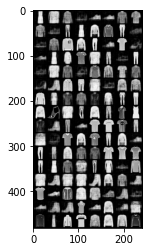

In [ ]:

oversampling_method = 'adasyn'
combx, comby, resx, resy = GenerateSamples(dataset_train, a, oversampling_method=oversampling_method)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Creating Resnet...")
model = create_resnet()
model.to(device) 
aux = testX.to(device) 
resnet_trainloader = get_balanced_dataset(dir_model,oversampling_method,a)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(resnet_trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

Class 1
Len Class 2000
Class 2
Len Class 1000
Class 3
Len Class 750
Class 4
Len Class 500
Class 5
Len Class 350
Class 6
Len Class 200
Class 7
Len Class 100
Class 8
Len Class 60
Class 9
Len Class 40

Creating Resnet...
train imgs before reshape  (40000, 784)
train labels  (40000,)
Counter({1.0: 4000, 2.0: 4000, 3.0: 4000, 4.0: 4000, 5.0: 4000, 6.0: 4000, 7.0: 4000, 8.0: 4000, 9.0: 4000, 0.0: 4000})
train imgs after reshape  (40000, 1, 28, 28)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


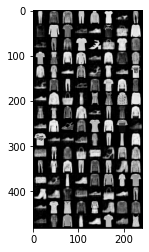

In [ ]:

oversampling_method = 'smote'
combx, comby, resx, resy = GenerateSamples(dataset_train, a, oversampling_method=oversampling_method)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Creating Resnet...")
model = create_resnet()
model.to(device) 
aux = testX.to(device) 
resnet_trainloader = get_balanced_dataset(dir_model,oversampling_method,a)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(resnet_trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

2


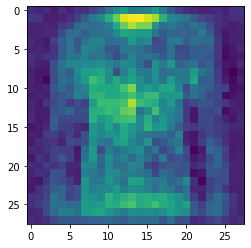

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(resx[3000].reshape(28,28))
print(resy[3000])

#### Execução

In [ ]:


for repeats in range(0,num_repeats): 
  #repeats = 0
  acs_array_smote = np.zeros(5)
  gm_array_smote = np.zeros(5)
  f1macro_array_smote = np.zeros(5)
  acs_array_adasyn = np.zeros(5)
  gm_array_adasyn = np.zeros(5)
  f1macro_array_adasyn = np.zeros(5)
  print('Repetição {}'.format(repeats+1))
  for i in range(0,5):

    #i=0
    aux_X = foldsX.copy()
    aux_Y = foldsY.copy()
    print('Fold {}'.format(i + 1))
    testX = foldsX[i]
    testY = foldsY[i]
    aux_X.pop(i)
    aux_Y.pop(i)
    trainX = torch.cat(aux_X)
    trainY = torch.cat(aux_Y)
    trainX_imbal, trainY_imbal = desbalancear_treino(trainX, trainY)
    dataset_train = torch.utils.data.TensorDataset(trainX_imbal, trainY_imbal)
    train_loader = DataLoader(dataset_train, batch_size=48000)

    #dataset_test_bal = torch.utils.data.TensorDataset(testX, testY)
    #test_loader_bal = DataLoader(dataset_test_bal, batch_size=12000)
    print("Training enc_dec...")
    train_enc_dec(dataset_train, i)
    print("Trained enc_dec")
    for oversampling_method in ['smote', 'adasyn']:
      print('Method: {}'.format(oversampling_method))
      print("Generating Samples...")
      #combx, comby = GenerateSamples(dataset_train, i, oversampling_method=oversampling_method)
      GenerateSamples(dataset_train, i, oversampling_method=oversampling_method)
      print("Generated Samples")
      #for j in range(10):
        #print("Classe", j)
        #print(combx[comby==j].shape)

      #plt.imshow(combx[1].reshape(28,28))
      #resnet()
      #print(comby[1])

      # create, fit and predict with resnet

      device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
      print("Creating Resnet...")
      model = create_resnet()
      model.to(device) 
      aux = testX.to(device) 
      resnet_trainloader = get_balanced_dataset(dir_model,oversampling_method,i)
      print("Carregou trainloader da Resnet")
      resnet_fit(model, args['resnet_num_epochs'], resnet_trainloader)
      print("Predicting outputs...")
      resnet_outputs = resnet_predict(model,aux)

      # compute results
      classification_result = [torch.argmax(resnet_outputs[i]).item() for i in range(12000)]
      y_labels = [testY[i].item() for i in range(12000)]
      print("Calculating Metrics...")
      # get metrics
      f1_macro = f1_score(classification_result, y_labels, average='macro')
      gm=geometric_mean_score(y_labels, classification_result, average='macro')
      cm=confusion_matrix(y_labels, classification_result)
      acs = avarage_class_acuracy(cm) 

      #store metrics
      if oversampling_method == 'smote':
        acs_array_smote[i] = acs
        gm_array_smote[i] = gm
        f1macro_array_smote[i] = f1_macro
      else:
        acs_array_adasyn[i] = acs
        gm_array_adasyn[i] = gm
        f1macro_array_adasyn[i] = f1_macro

  print("Saving on Google Drive")
  acs_array_smote_total[repeats] = acs_array_smote.mean() 
  gm_array_smote_total[repeats] = gm_array_smote.mean() 
  f1macro_array_smote_total[repeats] = f1macro_array_smote.mean() 
  acs_array_adasyn_total[repeats] = acs_array_adasyn.mean() 
  gm_array_adasyn_total[repeats] = gm_array_adasyn.mean() 
  f1macro_array_adasyn_total[repeats] = f1macro_array_adasyn.mean()
  result_df.loc[len(result_df.index)] = [acs_array_smote_total[repeats],gm_array_smote_total[repeats],f1macro_array_smote_total[repeats],acs_array_adasyn_total[repeats],gm_array_adasyn_total[repeats],f1macro_array_adasyn_total[repeats]]
  
  file_name = 'data_{}.csv'.format(repeats)
  dst = '/content/drive/MyDrive/deep_smote/' + file_name
  result_df.to_csv(file_name, mode='a',index=False)      
  shutil.copyfile(file_name, dst)

    



Repetição 1
Fold 1
Training enc_dec...
cuda
Epoch: 0 	Train Loss: 21.658369 	mse loss: 8.797120 	mse2 loss: 12.861248
Saving..
Epoch: 1 	Train Loss: 9.768695 	mse loss: 3.110408 	mse2 loss: 6.658287
Saving..
Epoch: 2 	Train Loss: 6.176252 	mse loss: 2.139893 	mse2 loss: 4.036359
Saving..
Epoch: 3 	Train Loss: 4.779342 	mse loss: 1.760882 	mse2 loss: 3.018460
Saving..
Epoch: 4 	Train Loss: 3.934222 	mse loss: 1.504778 	mse2 loss: 2.429444
Saving..
Epoch: 5 	Train Loss: 3.637365 	mse loss: 1.405780 	mse2 loss: 2.231586
Saving..
Epoch: 6 	Train Loss: 3.141408 	mse loss: 1.255519 	mse2 loss: 1.885889
Saving..
Epoch: 7 	Train Loss: 2.859112 	mse loss: 1.171045 	mse2 loss: 1.688067
Saving..
Epoch: 8 	Train Loss: 2.771034 	mse loss: 1.119615 	mse2 loss: 1.651419
Saving..
Epoch: 9 	Train Loss: 2.610037 	mse loss: 1.059702 	mse2 loss: 1.550334
Saving..
FashionMNIST/models/crs5/0/f_enc.pth
FashionMNIST/models/crs5/0/f_dec.pth

Trained enc_dec
Method: smote
Generating Samples...
Class 1
Len Class